In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
element = df.loc[89, 'Wine']
element

2

In [6]:
df['Wine'].unique()


array([1, 2, 3], dtype=int64)

In [7]:
df['Mg'].unique()


array([127, 100, 101, 113, 118, 112,  96, 121,  97,  98, 105,  95,  89,
        91, 102, 120, 115, 108, 116, 126, 124,  93,  94, 107, 106, 104,
       132, 110, 128, 117,  90, 103, 111,  92,  88,  87,  78, 151,  86,
       139, 136,  85,  99,  84,  70,  81,  80, 162, 134, 119,  82, 122,
       123], dtype=int64)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

In [10]:
X_train.head()


,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [12]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.41763404, 0.30737471, 0.1756175 , 0.22773182, 0.15812616,
       0.47943125, 0.71718694, 0.1152241 , 0.25176353, 0.6161374 ,
       0.55133133, 0.54748936, 0.53228737])

In [13]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.717187
Color.int               0.616137
Hue                     0.551331
OD                      0.547489
Proline                 0.532287
Phenols                 0.479431
Alcohol                 0.417634
Malic.acid              0.307375
Proanth                 0.251764
Acl                     0.227732
Ash                     0.175618
Mg                      0.158126
Nonflavanoid.phenols    0.115224
dtype: float64

<Axes: >

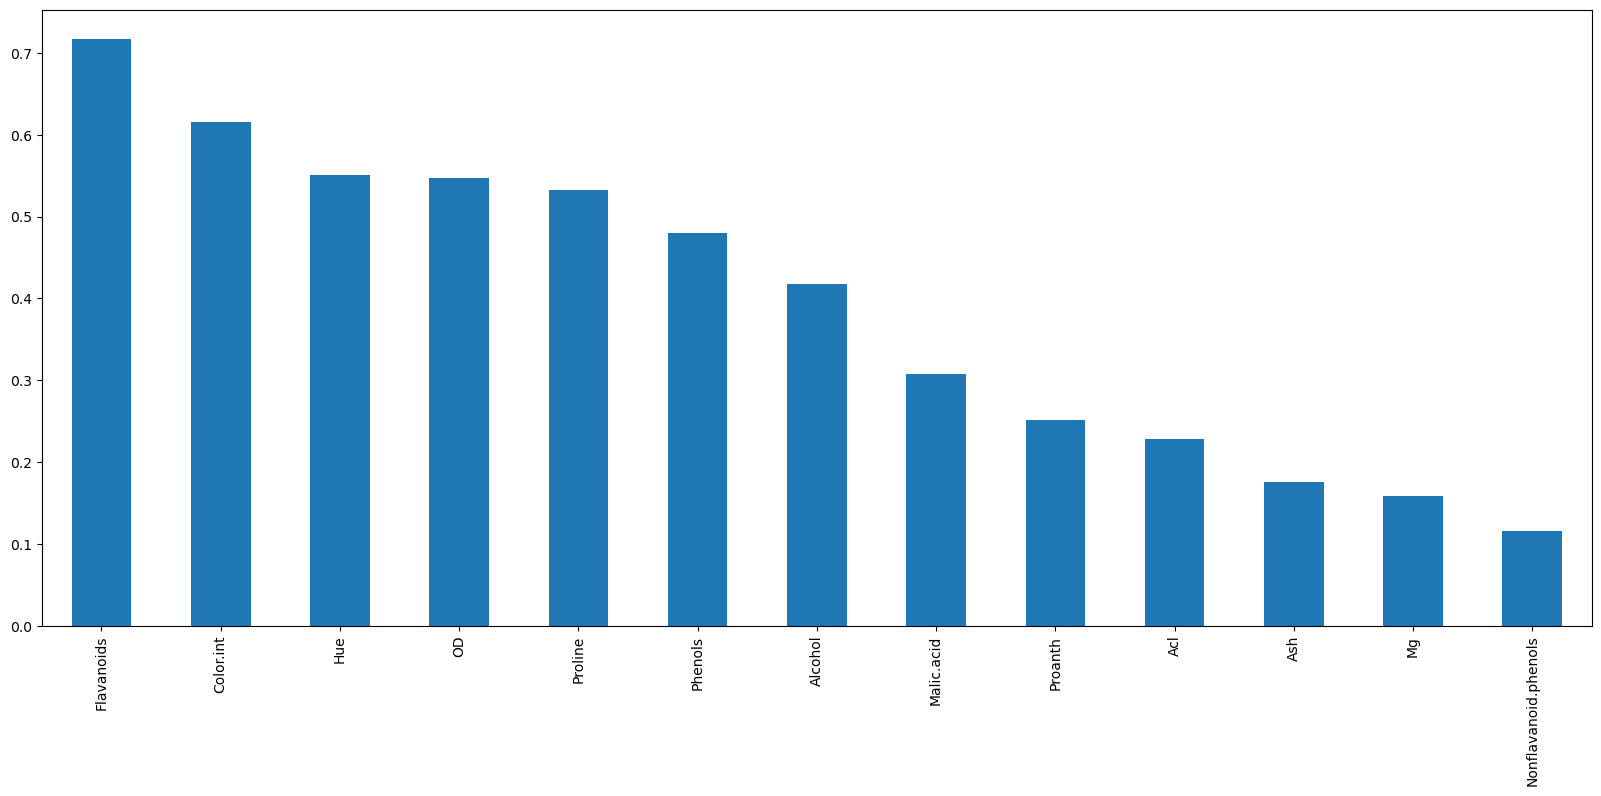

In [14]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [15]:
from sklearn.feature_selection import SelectKBest


In [16]:
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]


Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')